<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ вакансий из HeadHunter
   

In [1]:
# Импорт необходимых библиотек
import pandas as pd
import psycopg2

In [2]:
# Параметры подключения к базе:
DBNAME = 'project_sql'
USER = 'skillfactory'
PASSWORD = '***'
HOST = '***'
PORT = ***

In [3]:
# Создаем соединение с заданными параметрами
connection = psycopg2.connect(
    dbname=DBNAME,
    user=USER,
    host=HOST,
    password=PASSWORD,
    port=PORT
)

# Юнит 3. Предварительный анализ данных

1. Напишите запрос, который посчитает количество вакансий в нашей базе (вакансии находятся в таблице vacancies).

In [4]:
# текст запроса
query_3_1 = f'''
SELECT
    COUNT(id) as vacancies_cnt
FROM vacancies
'''

In [5]:
# результат запроса
df_3_1 = pd.read_sql_query(query_3_1, connection)
df_3_1

<ipython-input-5-f33310df885f>:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_3_1 = pd.read_sql_query(query_3_1, connection)


,vacancies_cnt
0,49197


2. Напишите запрос, который посчитает количество работодателей (таблица employers).

In [10]:
# текст запроса
query_3_2 = f'''
SELECT
    COUNT(id) as employers_cnt
FROM employers
'''

In [11]:
# результат запроса
df_3_2 = pd.read_sql_query(query_3_2, connection)
df_3_2

<ipython-input-11-7515105202d9>:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_3_2 = pd.read_sql_query(query_3_2, connection)


,employers_cnt
0,23501


3. Посчитате с помощью запроса количество регионов (таблица areas).

In [12]:
# текст запроса
query_3_3 = f'''
SELECT
    COUNT(id) as areas_cnt
FROM areas
'''

In [13]:
# результат запроса
df_3_3 = pd.read_sql_query(query_3_3, connection)
df_3_3

<ipython-input-13-05d7e6da37b1>:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_3_3 = pd.read_sql_query(query_3_3, connection)


,areas_cnt
0,1362


4. Посчитате с помощью запроса количество сфер деятельности в базе (таблица industries).

In [14]:
# текст запроса
query_3_4 = f'''
SELECT
    COUNT(id) as industries_cnt
FROM industries
'''

In [15]:
# результат запроса
df_3_4 = pd.read_sql_query(query_3_4, connection)
df_3_4

<ipython-input-15-514047abcccb>:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_3_4 = pd.read_sql_query(query_3_4, connection)


,industries_cnt
0,294


***

**Выводы:**<br>
Согласно предварительному анализу данных получены следующие выводы:<br>
- общее количество вакансий в таблице 'vacancies' - 49197;<br>
- общее количество работодателей в таблице 'employers' - 23501;<br>
- oбщее количество регионов в таблице 'areas' -  1362;<br>
- общее количество сфер деятельности в таблице 'industries' - 294.

# Юнит 4. Детальный анализ вакансий

1. Напишите запрос, который позволит узнать, сколько (cnt) вакансий в каждом регионе (area).
Отсортируйте по количеству вакансий в порядке убывания.

In [16]:
# текст запроса
query_4_1 = f'''
SELECT
    a.name as area,
    count(v.id) as cnt
FROM
    areas a
    JOIN vacancies v ON v.area_id = a.id
GROUP BY 1
ORDER BY 2 DESC
LIMIT 5
'''

In [17]:
# результат запроса
df_4_1 = pd.read_sql_query(query_4_1, connection)
df_4_1

<ipython-input-17-e0d1ca36e390>:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_4_1 = pd.read_sql_query(query_4_1, connection)


,area,cnt
0,Москва,5333
1,Санкт-Петербург,2851
2,Минск,2112
3,Новосибирск,2006
4,Алматы,1892


2. Напишите запрос, чтобы определить у какого количества вакансий заполнено хотя бы одно из двух полей с зарплатой.

In [18]:
# текст запроса
query_4_2 = f'''
SELECT
    count(v.id) as salary_in_vacantions
FROM
    vacancies v
WHERE v.salary_from IS NOT NULL OR v.salary_to IS NOT NULL
'''

In [19]:
# результат запроса
df_4_2 = pd.read_sql_query(query_4_2, connection)
df_4_2

<ipython-input-19-a68fde1d0c96>:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_4_2 = pd.read_sql_query(query_4_2, connection)


,salary_in_vacantions
0,24073


3. Найдите средние значения для нижней и верхней границы зарплатной вилки. Округлите значения до целого.

In [20]:
# текст запроса
query_4_3 = f'''
SELECT
    round(avg(v.salary_from)) AS avg_salary_from,
    round(avg(v.salary_to)) AS avg_salary_to
FROM vacancies v
'''

In [21]:
# результат запроса
df_4_3 = pd.read_sql_query(query_4_3, connection)
df_4_3

<ipython-input-21-5722848d6806>:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_4_3 = pd.read_sql_query(query_4_3, connection)


,avg_salary_from,avg_salary_to
0,71065.0,110537.0


4. Напишите запрос, который выведет количество вакансий для каждого сочетания типа рабочего графика (schedule) и типа трудоустройства (employment), используемого в вакансиях. Результат отсортируйте по убыванию количества.


In [22]:
# текст запроса
query_4_4 = f'''
SELECT
    v.schedule,
    v.employment,
    count(v.id) AS cnt
FROM vacancies v
GROUP BY v.schedule, v.employment
ORDER BY cnt DESC
'''

In [23]:
# результат запроса
df_4_4 = pd.read_sql_query(query_4_4, connection)
df_4_4

<ipython-input-23-f3d798c9d673>:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_4_4 = pd.read_sql_query(query_4_4, connection)


,schedule,employment,cnt
0,Полный день,Полная занятость,35367
1,Удаленная работа,Полная занятость,7802
2,Гибкий график,Полная занятость,1593
3,Удаленная работа,Частичная занятость,1312
4,Сменный график,Полная занятость,940
5,Полный день,Стажировка,569
6,Вахтовый метод,Полная занятость,367
7,Полный день,Частичная занятость,347
8,Гибкий график,Частичная занятость,312
9,Полный день,Проектная работа,141


5. Напишите запрос, выводящий значения поля Требуемый опыт работы (experience) в порядке возрастания количества вакансий, в которых указан данный вариант опыта.

In [24]:
# текст запроса
query_4_5 = f'''
SELECT
    v.experience as experience,
    count(v.id) as vacancies_cnt
FROM vacancies as v
GROUP BY v.experience
ORDER BY vacancies_cnt ASC;
'''

In [25]:
# результат запроса
df_4_5 = pd.read_sql_query(query_4_5, connection)
df_4_5

<ipython-input-25-a407e816ef92>:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_4_5 = pd.read_sql_query(query_4_5, connection)


,experience,vacancies_cnt
0,Более 6 лет,1337
1,Нет опыта,7197
2,От 3 до 6 лет,14511
3,От 1 года до 3 лет,26152


***

**Выводы:**<br>
Согласно детальному анализу данных получены следующие выводы:<br>
- пятерка лидеров городов по количеству представленных вакансий: Москва, Санкт-Петербург, Минск, Новосибирск, Алматы;<br>
- средние значения для нижней и верхней границы зарплатной вилки от 71065 до 110537 руб;<br>
- в большинстве вакансий, самой популярной схемой работы является: Полный день и Полная занятость, на втором месте: Удаленная работа и Полная занятость, на третьем месте: Гибкий график и Полная занятость ;<br>
- большинство работодателей хотят видеть кандидатов с опытом работы от 1 года до 3 лет, на втором месте идет запрос на кандидатов с опытом работы от 3 до 6 лет, на третьем месте кандидаты без опыта.

# Юнит 5. Анализ работодателей

1. Напишите запрос, который позволит узнать, какие работодатели находятся на первом и пятом месте по количеству вакансий.

In [26]:
# текст запроса
query_5_1 = f'''
(SELECT
    e.name as employers,
    COUNT(v.id) as cnt
FROM employers e
    JOIN vacancies v ON v.employer_id = e.id
GROUP BY 1
ORDER BY 2 DESC
LIMIT 1)
UNION ALL
(SELECT
    e.name as employers,
    COUNT(v.id) as cnt
FROM employers e
    JOIN vacancies v ON v.employer_id = e.id
GROUP BY 1
ORDER BY 2 DESC
OFFSET 4
LIMIT 1)
'''

In [27]:
# результат запроса
df_5_1 = pd.read_sql_query(query_5_1, connection)
df_5_1

<ipython-input-27-e71d17c95279>:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_5_1 = pd.read_sql_query(query_5_1, connection)


,employers,cnt
0,Яндекс,1933
1,Газпром нефть,331


2. Напишите запрос, который для каждого региона выведет количество работодателей и вакансий в нём.
Среди регионов, в которых нет вакансий, найдите тот, в котором наибольшее количество работодателей.


In [28]:
# текст запроса
query_5_2 = f'''
SELECT
    a.name as area_name,
    COUNT(e.name) as employers_cnt,
    COUNT(v.id) as vacancies_cnt
FROM areas as a
    LEFT JOIN employers as e ON e.area = a.id
    LEFT JOIN vacancies as v ON e.area = v.area_id
GROUP BY a.name
ORDER BY
    vacancies_cnt NULLS FIRST,
    employers_cnt desc
LIMIT 5;
'''

In [29]:
# результат запроса
df_5_2 = pd.read_sql_query(query_5_2, connection)
df_5_2

<ipython-input-29-14e6adc3ead1>:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_5_2 = pd.read_sql_query(query_5_2, connection)


,area_name,employers_cnt,vacancies_cnt
0,Россия,410,0
1,Казахстан,207,0
2,Московская область,75,0
3,Краснодарский край,19,0
4,Беларусь,18,0


3. Для каждого работодателя посчитайте количество регионов, в которых он публикует свои вакансии. Отсортируйте результат по убыванию количества.


In [30]:
# текст запроса
query_5_3 = f'''
SELECT
    e.name as employers,
    COUNT(DISTINCT v.area_id) as area_cnt
FROM vacancies v
    JOIN employers e ON e.id = v.employer_id
GROUP BY 1
ORDER BY 2 DESC
'''

In [31]:
# результат запроса
df_5_3 = pd.read_sql_query(query_5_3, connection)
df_5_3

<ipython-input-31-e83115aae06f>:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_5_3 = pd.read_sql_query(query_5_3, connection)


,employers,area_cnt
0,Яндекс,181
1,Ростелеком,152
2,Спецремонт,116
3,Поляков Денис Иванович,88
4,ООО ЕФИН,71
...,...,...
14761,UniSol,1
14762,UNISTORY LLC,1
14763,UNIT6,1
14764,United Distribution,1


4. Напишите запрос для подсчёта количества работодателей, у которых не указана сфера деятельности.

In [32]:
# текст запроса
query_5_4 = f'''
SELECT
    COUNT(e.name) as employers_cnt
FROM employers e
    LEFT JOIN employers_industries ei ON e.id = ei.employer_id
    WHERE ei.industry_id IS NULL
'''

In [33]:
# результат запроса
df_5_4 = pd.read_sql_query(query_5_4, connection)
df_5_4

<ipython-input-33-59cd48778173>:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_5_4 = pd.read_sql_query(query_5_4, connection)


,employers_cnt
0,8419


5. Напишите запрос, чтобы узнать название компании, находящейся на третьем месте в алфавитном списке (по названию) компаний, у которых указано четыре сферы деятельности.

In [34]:
# текст запроса
query_5_5 = f'''
SELECT
    e.name as employer,
    COUNT(ei.industry_id) as industries_cnt
FROM employers e
    LEFT JOIN employers_industries ei ON e.id = ei.employer_id
GROUP BY 1
HAVING COUNT(ei.employer_id) = 4
ORDER BY 1
OFFSET 2
LIMIT 1
'''

In [35]:
# результат запроса
df_5_5 = pd.read_sql_query(query_5_5, connection)
df_5_5

<ipython-input-35-55a59fdce066>:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_5_5 = pd.read_sql_query(query_5_5, connection)


,employer,industries_cnt
0,2ГИС,4


6. С помощью запроса выясните, у какого количества работодателей в качестве сферы деятельности указана Разработка программного обеспечения.


In [36]:
# текст запроса
query_5_6 = f'''
SELECT
    COUNT(e.name) as employers_cnt
FROM employers e
    LEFT JOIN employers_industries ei ON e.id = ei.employer_id
    LEFT JOIN industries i ON ei.industry_id = i.id
    WHERE i.name = 'Разработка программного обеспечения'
'''

In [37]:
# результат запроса
df_5_6 = pd.read_sql_query(query_5_6, connection)
df_5_6

<ipython-input-37-b8cbf15ac659>:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_5_6 = pd.read_sql_query(query_5_6, connection)


,employers_cnt
0,3553


7. Для компании «Яндекс» выведите список регионов-миллионников, в которых представлены вакансии компании, вместе с количеством вакансий в этих регионах. Также добавьте строку Total с общим количеством вакансий компании. Результат отсортируйте по возрастанию количества.

Список городов-милионников надо взять [отсюда](https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D1%80%D0%BE%D0%B4%D0%B0-%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%B5%D1%80%D1%8B_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8).

Если возникнут трудности с этим задание посмотрите материалы модуля  PYTHON-17. Как получать данные из веб-источников и API.

In [38]:
# код для получения списка городов-милионников со страницы Википедии
import requests
from bs4 import BeautifulSoup

URL = 'https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D1%80%D0%BE%D0%B4%D0%B0-%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%B5%D1%80%D1%8B_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8'

response = requests.get(URL)
page = BeautifulSoup(response.text, 'html.parser')
table_tag = page.find('table', class_='standard sortable')
tbody = table_tag.find('tbody')
trs = tbody.find_all('tr')

# mega_cities – список для названий городов-миллионников
mega_cities = []
for row in trs[1:]:
    tds = row.find_all('td')
    mega_cities.append(tds[1].text)

mega_cities = tuple(mega_cities)

In [39]:
# тело запроса
query_5_7 = f'''
SELECT
    a.name as name,
    COUNT(v.id) as cnt
FROM vacancies as v
    LEFT JOIN areas as a ON a.id = v.area_id
    LEFT JOIN employers as e ON v.employer_id = e.id
    WHERE e.name = 'Яндекс' and a.name in {mega_cities}
GROUP BY a.name
UNION
SELECT
    'Total',
    COUNT(v.id)
FROM vacancies as v
    LEFT JOIN  areas as a ON a.id = v.area_id
    LEFT JOIN  employers as e ON v.employer_id = e.id
    WHERE e.name = 'Яндекс' and a.name in {mega_cities}
ORDER BY cnt ASC;
'''

In [40]:
# результат запроса
df_5_7 = pd.read_sql_query(query_5_7, connection)
display(df_5_7)

<ipython-input-40-1757d0fe397a>:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_5_7 = pd.read_sql_query(query_5_7, connection)


,name,cnt
0,Омск,21
1,Челябинск,22
2,Красноярск,23
3,Волгоград,24
4,Пермь,25
5,Казань,25
6,Ростов-на-Дону,25
7,Уфа,26
8,Самара,26
9,Краснодар,30


***

**Выводы:**<br>
Согласно анализу работадателей из представленной БД получены следующие выводы:<br>
- на первом месте по количеству размещенных вакансий находится компания Яндекс;
- регион в котором наибольшее количество работодателей и представленных вакансий: Росссия;
- компания Яндекс публикует свои вакансии в 181 регионе/городе;
- количества работодателей, у которых не указана сфера деятельности в вакансии: 8419;
- компания у которой указано четыре сферы деятельности в представленной БД: 2ГИС;
- у 3553 работодателей в качестве сферы деятельности указана «Разработка программного обеспечения»;
- в 16-ти городах миллионниках компания Яндекс разместила от 21 до 54 вакансий, что суммарно составлает 485 вакансий или 24% от общего кол-ва размещенных компанией вакансий.

# Юнит 6. Предметный анализ

1. Сколько вакансий имеет отношение к данным?

Считаем, что вакансия имеет отношение к данным, если в её названии содержатся слова 'data' или 'данн'.

*Подсказка: Обратите внимание, что названия вакансий могут быть написаны в любом регистре.*


In [41]:
# текст запроса
query_6_1 = f'''
SELECT
    COUNT(v.id) as vacancies_cnt
FROM vacancies v
WHERE lower(v.name) LIKE '%data%' OR lower(v.name) LIKE '%данн%'
'''

In [42]:
# результат запроса
df_6_1 = pd.read_sql_query(query_6_1, connection)
df_6_1

<ipython-input-42-e8ca8a3733ce>:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_6_1 = pd.read_sql_query(query_6_1, connection)


,vacancies_cnt
0,1771


2. Сколько есть подходящих вакансий для начинающего дата-сайентиста?
Будем считать вакансиями для дата-сайентистов такие, в названии которых есть хотя бы одно из следующих сочетаний:
* 'data scientist'
* 'data science'
* 'исследователь данных'
* 'ML' (здесь не нужно брать вакансии по HTML)
* 'machine learning'
* 'машинн%обучен%'

** В следующих заданиях мы продолжим работать с вакансиями по этому условию.*

Считаем вакансиями для специалистов уровня Junior следующие:
* в названии есть слово 'junior' *или*
* требуемый опыт — Нет опыта *или*
* тип трудоустройства — Стажировка.


In [43]:
# текст запроса
query_6_2 = f'''
SELECT
    COUNT(v.id) as vacancies_cnt
FROM vacancies v
WHERE (
    v.name ILIKE '%data scientist%' OR
    v.name ILIKE '%data science%' OR
    v.name ILIKE '%исследователь данных%' OR
    (v.name LIKE '%ML%' AND v.name NOT LIKE '%HTML%') OR
    v.name ILIKE '%machine learning%' OR
    v.name ILIKE '%машинн% обучен%'
    )
    AND (
        v.name ILIKE '%junior%' OR
        v.experience = 'Нет опыта' OR
        v.schedule ILIKE '%cтажировка%'
        )
'''

In [44]:
# результат запроса
df_6_2 = pd.read_sql_query(query_6_2, connection)
df_6_2

<ipython-input-44-b7a554361891>:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_6_2 = pd.read_sql_query(query_6_2, connection)


,vacancies_cnt
0,51


3. Сколько есть вакансий для DS, в которых в качестве ключевого навыка указан SQL или postgres?

** Критерии для отнесения вакансии к DS указаны в предыдущем задании.*

In [45]:
# текст запроса
query_6_3 = f'''
SELECT
   COUNT(v.id) as vacancies_cnt
FROM vacancies v
WHERE(
    v.name ILIKE '%data scientist%' OR
    v.name ILIKE '%data science%' OR
    v.name ILIKE '%исследователь данных%' OR
    (v.name ILIKE '%ML%' AND v.name NOT ILIKE '%HTML%') OR
    v.name ILIKE '%machine learning%' OR
    v.name ILIKE '%машинн% обучен%'
    AND (v.key_skills IS NOT NULL))
    AND ((v.key_skills LIKE '%SQL%') OR (key_skills LIKE '%postgres%'))
'''

In [46]:
# результат запроса
df_6_3 = pd.read_sql_query(query_6_3, connection)
df_6_3

<ipython-input-46-8a4199a81e3b>:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_6_3 = pd.read_sql_query(query_6_3, connection)


,vacancies_cnt
0,229


4. Проверьте, насколько популярен Python в требованиях работодателей к DS.Для этого вычислите количество вакансий, в которых в качестве ключевого навыка указан Python.

** Это можно сделать помощью запроса, аналогичного предыдущему.*

In [47]:
# текст запроса
query_6_4 = f'''
SELECT
    COUNT(v.id) "count vacancies"
FROM vacancies v
WHERE(
    v.name ILIKE '%data scientist%' OR
    v.name ILIKE '%data science%' OR
    v.name ILIKE '%исследователь данных%' OR
    (v.name ILIKE '%ML%' AND v.name NOT ILIKE '%HTML%') OR
    v.name ILIKE '%machine learning%' OR
    v.name ILIKE '%машинн% обучен%'
    AND (v.key_skills IS NOT NULL))
    AND (v.key_skills ILIKE '%Python%')
'''

In [48]:
# результат запроса
df_6_4 = pd.read_sql_query(query_6_4, connection)
df_6_4

<ipython-input-48-95116ecfece2>:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_6_4 = pd.read_sql_query(query_6_4, connection)


,count vacancies
0,357


5. Сколько ключевых навыков в среднем указывают в вакансиях для DS?
Ответ округлите до двух знаков после точки-разделителя.

In [49]:
# текст запроса
query_6_5 = f'''
SELECT
    ROUND(AVG(length(v.key_skills) - length(replace(v.key_skills, CHR(9), '')) + 1), 2) AS avg_key_skills
FROM vacancies v
WHERE
    v.key_skills IS NOT NULL
    AND (v.name ILIKE '%data scientist%' OR
        v.name ILIKE '%data science%' OR
        v.name ILIKE '%исследователь данных%' OR
        (v.name LIKE '%ML%' AND v.name NOT LIKE '%HTML%') OR
        v.name ILIKE '%machine learning%' OR
        v.name ILIKE '%машинн% обучен%'
    )
'''

In [50]:
# результат запроса
df_6_5 = pd.read_sql_query(query_6_5, connection)
df_6_5

<ipython-input-50-1cefb534f424>:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_6_5 = pd.read_sql_query(query_6_5, connection)


,avg_key_skills
0,6.41


6. Напишите запрос, позволяющий вычислить, какую зарплату для DS в **среднем** указывают для каждого типа требуемого опыта (уникальное значение из поля *experience*).

При решении задачи примите во внимание следующее:
1. Рассматриваем только вакансии, у которых заполнено хотя бы одно из двух полей с зарплатой.
2. Если заполнены оба поля с зарплатой, то считаем зарплату по каждой вакансии как сумму двух полей, делённую на 2. Если заполнено только одно из полей, то его и считаем зарплатой по вакансии.
3. Если в расчётах участвует null, в результате он тоже даст null (посмотрите, что возвращает запрос select 1 + null). Чтобы избежать этой ситуацию, мы воспользуемся функцией [coalesce](https://postgrespro.ru/docs/postgresql/9.5/functions-conditional#functions-coalesce-nvl-ifnull), которая заменит null на значение, которое мы передадим. Например, посмотрите, что возвращает запрос `select 1 + coalesce(null, 0)`

Выясните, на какую зарплату в среднем может рассчитывать дата-сайентист с опытом работы от 3 до 6 лет. Результат округлите до целого числа.

In [51]:
# текст запроса
query_6_6 = f'''
SELECT
     v.experience AS experience,
    ROUND(AVG((COALESCE(v.salary_from, v.salary_to) + COALESCE(v.salary_to, v.salary_from)) / 2)) AS avg_salary
FROM vacancies v
WHERE
    v.key_skills IS NOT NULL
    AND (v.name ILIKE '%data scientist%' OR
        v.name ILIKE '%data science%' OR
        v.name ILIKE '%исследователь данных%' OR
        (v.name LIKE '%ML%' AND v.name NOT LIKE '%HTML%') OR
        v.name ILIKE '%machine learning%' OR
        v.name ILIKE '%машинн% обучен%')
    AND (salary_from IS NOT NULL OR salary_to IS NOT NULL)
GROUP BY
    v.experience;
'''

In [52]:
# результат запроса
df_6_6 = pd.read_sql_query(query_6_6, connection)
df_6_6


<ipython-input-52-12f33d1ad98b>:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_6_6 = pd.read_sql_query(query_6_6, connection)


,experience,avg_salary
0,Нет опыта,74643.0
1,От 1 года до 3 лет,146704.0
2,От 3 до 6 лет,243115.0


***

**Выводы:**<br>
Согласно предметному анализу данных получены следующие выводы:<br>
- вакансии представленные в БД связанные с данными - 1771 ед.;
- количество вакансий связанных с данными для специалистов уровня Junior составляет - 51 ед.;
- количество вакансий для DS, в которых в качестве ключевого навыка указан SQL или postgres - 229 ед.;
- количество вакансий, в которых в качестве ключевого навыка указан Python для специалистов DS - 357 ед.;
- количество ключевых навыков, которые в среднем указывают в вакансиях для DS составляет - 6.41 навыков;
- уровень средней зарплаты для вакансии DS, которую указывают для каждого типа требуемого опыта следующие:<br>
а) Нет опыта -	74 643 руб.<br>
б) Опыт от 1 года до 3 лет - 146 704 руб.<br>
в) Опыт от 3 до 6 лет - 243 115 руб.

# Общий вывод по проекту

In [53]:
# подведем итог исследования, обобщите выводы
# здесь можно (это будет плюсом) провести дополнительные исследования данных, сделать прогнозы, продумать варианты продолжения исследования

In [54]:
# дополнительный запрос
# выведим 20 самых часто встречающихся ключевых навыков (после разбиения) из вакансий в которых упоминаются Python и SQL (или Postgres)
query_in_addition = f'''
SELECT DISTINCT
    LOWER(regexp_split_to_table(v.key_skills, CHR(9))) "key_skills",
    COUNT (*) "count key_skills"
FROM vacancies v
WHERE(
    v.name ILIKE '%data scientist%' OR
    v.name ILIKE '%data science%' OR
    v.name ILIKE '%исследователь данных%' OR
    (v.name ILIKE '%ML%' AND v.name NOT ILIKE '%HTML%') OR
    v.name ILIKE '%machine learning%' OR
    v.name ILIKE '%машинн% обучен%'
    AND (v.key_skills IS NOT NULL))
    AND (v.key_skills ILIKE '%Python%')
    AND (v.key_skills ILIKE '%SQL%' OR v.key_skills ILIKE '%postgres%')
GROUP BY 1
ORDER BY 2 DESC
LIMIT 20
'''

In [55]:
# результат запроса
df_query_in_addition = pd.read_sql_query(query_in_addition, connection)
df_query_in_addition

<ipython-input-55-c82f65c1df04>:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_query_in_addition = pd.read_sql_query(query_in_addition, connection)


,key_skills,count key_skills
0,python,176
1,sql,167
2,machine learning,52
3,математическая статистика,43
4,git,36
5,анализ данных,32
6,data analysis,27
7,pandas,26
8,big data,24
9,data science,23


<ipython-input-56-ed7d176eddbc>:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_6_6 = pd.read_sql_query(query_6_6, connection)


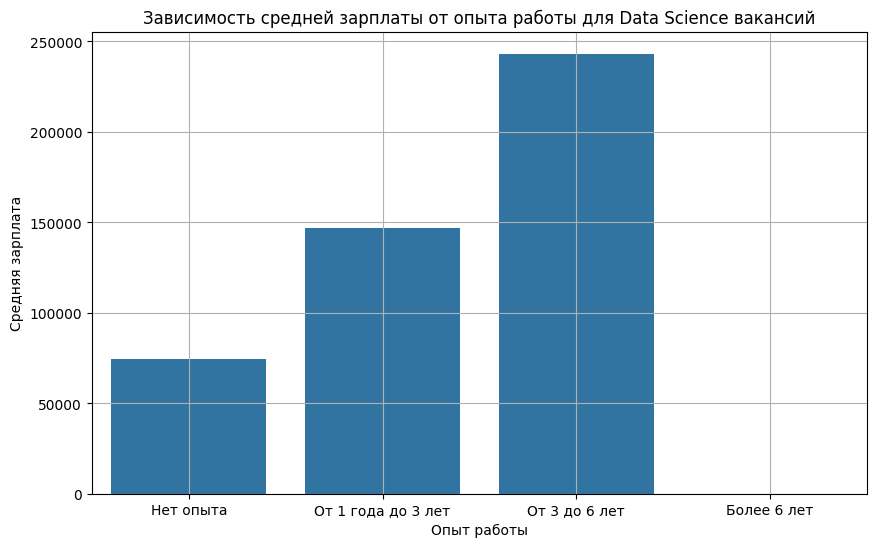

In [56]:
# Построим зависимость средней зарплаты от опыта работы для Data Science вакансий

# загружаем библиотеки
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# выполним запрос

# получим данные
df_6_6 = pd.read_sql_query(query_6_6, connection)
# преобразуем 'experience' в категорию с указанием порядка
experience_order = ['Нет опыта', 'От 1 года до 3 лет', 'От 3 до 6 лет', 'Более 6 лет']
df_6_6['experience'] = pd.Categorical(df_6_6['experience'], categories=experience_order, ordered=True)

# построим график
plt.figure(figsize=(10, 6))
sns.barplot(x='experience', y='avg_salary', data=df_6_6, order=experience_order)
plt.title('Зависимость средней зарплаты от опыта работы для Data Science вакансий')
plt.xlabel('Опыт работы')
plt.ylabel('Средняя зарплата')
plt.grid(True)

**Общий вывод по проекту:**<br>
В ходе поэтапного выполнения проекта "Project_2" были достигнуты следующие результаты:
- ознакомление с данными о вакансиях HH;
- проведение предварительного анализа данных базы данных;
- детализированный анализ вакансий в базе данных;
- анализ информации о работодателях в базе данных;
- предметный анализ содержимого базы данных.<br>
Результаты и выводы для каждого из этапов представлены в соответствующих разделах данного проекта.<br>
Дополнительные исследования данных показали, чтобы быть конкурентоспособным среди соискателей Data Science вакансий необходимо владеть не только 6-ю ключевыми навыками, а от 6 и более навыками, которые нарабатываются с опытом работы и соответственно влияют на уровень заработной платы.<br>
Так например, согласно выше прдеставленному графику зарплата у специалистов  сфере DS при опыте от 1 года до 3 лет в 2 раза выше чем у начинающего специалиста, а опытный специалист уровня senior с опытом от 3 до 6 лет получает в среднем в 3.2 раза выше, чем специалист без опыта.